In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [26]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [27]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-06-03--16h-33m-47s',
 '2025-06-03--16h-35m-37s',
 '2025-06-03--16h-37m-20s',
 '2025-06-03--16h-39m-05s',
 '2025-06-03--16h-40m-50s',
 '2025-06-03--16h-42m-36s',
 '2025-06-03--16h-44m-21s',
 '2025-06-03--16h-46m-06s',
 '2025-06-03--16h-47m-52s',
 '2025-06-03--16h-49m-39s',
 '2025-06-03--16h-51m-26s',
 '2025-06-03--16h-53m-14s',
 '2025-06-03--16h-54m-59s',
 '2025-06-03--16h-56m-47s',
 '2025-06-03--16h-58m-36s',
 '2025-06-03--17h-00m-23s',
 '2025-06-03--17h-02m-09s',
 '2025-06-03--17h-03m-56s',
 '2025-06-03--17h-05m-43s',
 '2025-06-03--17h-07m-28s',
 '2025-06-03--17h-09m-15s',
 '2025-06-03--17h-11m-02s',
 '2025-06-03--17h-12m-49s',
 '2025-06-03--17h-14m-36s',
 '2025-06-03--17h-16m-22s',
 '2025-06-03--17h-18m-08s',
 '2025-06-03--17h-19m-55s',
 '2025-06-03--17h-21m-56s',
 '2025-06-03--17h-23m-44s',
 '2025-06-03--17h-25m-29s',
 '2025-06-03--17h-27m-14s',
 '2025-06-03--17h-29m-01s',
 '2025-06-03--17h-30m-48s',
 '2025-06-03--17h-32m-37s',
 '2025-06-03--17h-34m-23s',
 '2025-06-03--17h-36

In [28]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "corrected_estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    # if repetitions is not in params, set it to 1
    if "repetitions" not in params.columns:
        params["repetitions"] = pd.Series([1])
    else:
        params["repetitions"] = params["repetitions"].astype(int)

    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "corrected_estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
0,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
1,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
2,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
3,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
4,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3813808,2025-06-03--20h-24m-15s,96.0,55.0,3.0,46.0,200.0,1.525781,1.418051,1.418051,1.570796,1.570796
3813809,2025-06-03--20h-24m-15s,106.0,47.0,1.0,46.0,200.0,1.565796,1.527494,1.527494,1.570796,1.570796
3813810,2025-06-03--20h-24m-15s,78.0,75.0,3.0,44.0,200.0,1.415169,1.396752,1.396752,1.570796,1.570796
3813811,2025-06-03--20h-24m-15s,87.0,57.0,4.0,52.0,200.0,1.545794,1.377206,1.377206,1.570796,1.570796


In [29]:
estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]

/tmp/ipykernel_1152096/3925035558.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]


,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
30395,2025-06-03--16h-33m-47s,216.0,531561.0,702.0,1.0,532480.0,0.058792,0.501679,0.501679,0.0,0.000000
809927,2025-06-03--17h-19m-55s,117.0,529193.0,729.0,1.0,530040.0,0.056574,0.372992,0.372992,0.0,0.785398
1569224,2025-06-03--18h-06m-25s,121.0,535037.0,722.0,0.0,535880.0,0.056099,0.380761,0.380761,0.0,1.570796


# Load Theory Curves

In [30]:
theta_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'theta_estimator_stats.csv'))
theta_theory

,theta,n,theta_estimator_mean,theta_estimator_variance
0,0.000000,40,0.000000,0.000000
1,0.006283,40,0.000177,0.000040
2,0.012566,40,0.000707,0.000158
3,0.018850,40,0.001589,0.000354
4,0.025133,40,0.002820,0.000626
...,...,...,...,...
2500,3.116460,200,3.135388,0.000594
2501,3.122743,200,3.138075,0.000343
2502,3.129026,200,3.140020,0.000156
2503,3.135309,200,3.141198,0.000039


In [31]:
delta_phi_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats.csv'))
delta_phi_theory

,delta_phi,theta,n,delta_phi_estimator_mean,delta_phi_estimator_variance
0,0.000000,0.785398,40,0.000000,0.000000
1,0.003142,0.785398,40,0.000031,0.000010
2,0.006283,0.785398,40,0.000126,0.000041
3,0.009425,0.785398,40,0.000283,0.000092
4,0.012566,0.785398,40,0.000503,0.000164
...,...,...,...,...,...
7510,1.558230,1.570796,200,1.569223,0.000156
7511,1.561372,1.570796,200,1.569909,0.000088
7512,1.564513,1.570796,200,1.570402,0.000039
7513,1.567655,1.570796,200,1.570698,0.000010


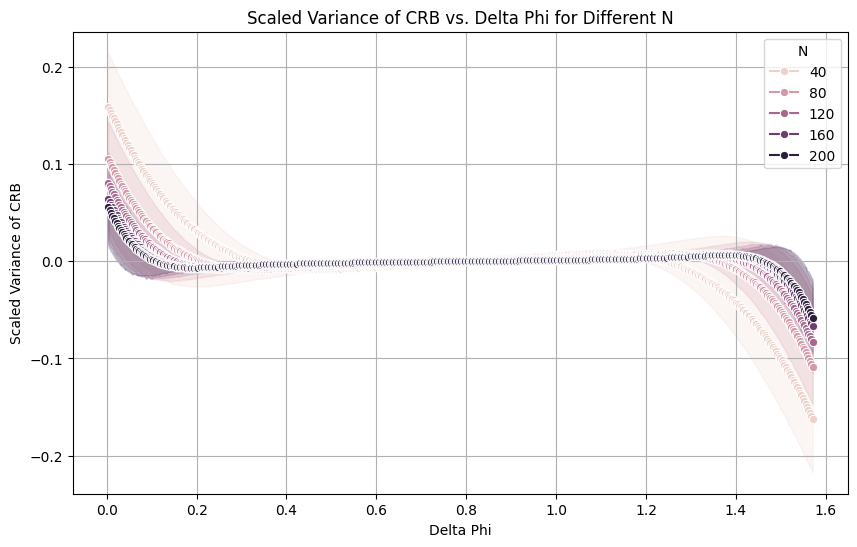

In [32]:
overlap_adjusted_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'phase_estimation_multiN.csv'))
overlap_adjusted_theory = overlap_adjusted_theory

# Plot VarCRB_scaled against delta_phi for each N from overlap_adjusted_theory
def plot_varcrb_scaled_vs_delta_phi(df):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="delta_phi", y="bias", hue="N", marker="o")
    plt.title("Scaled Variance of CRB vs. Delta Phi for Different N")
    plt.xlabel("Delta Phi")
    plt.ylabel("Scaled Variance of CRB")
    plt.legend(title="N", loc='upper right')
    plt.grid(True)
    plt.show()
plot_varcrb_scaled_vs_delta_phi(overlap_adjusted_theory)

# Theta

In [33]:
# round N to the nearest 40
estimates_df["nearest_40_N"] = estimates_df["N"].apply(lambda x: 0 if x > 200 else round(x / 40) * 40)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi,nearest_40_N
0,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
1,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
2,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
3,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
4,2025-06-03--16h-33m-47s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
3813808,2025-06-03--20h-24m-15s,96.0,55.0,3.0,46.0,200.0,1.525781,1.418051,1.418051,1.570796,1.570796,200
3813809,2025-06-03--20h-24m-15s,106.0,47.0,1.0,46.0,200.0,1.565796,1.527494,1.527494,1.570796,1.570796,200
3813810,2025-06-03--20h-24m-15s,78.0,75.0,3.0,44.0,200.0,1.415169,1.396752,1.396752,1.570796,1.570796,200
3813811,2025-06-03--20h-24m-15s,87.0,57.0,4.0,52.0,200.0,1.545794,1.377206,1.377206,1.570796,1.570796,200


In [34]:
theta_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",
    "delta_phi_estimate": ["mean", "std", "var"]
}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates.columns = ['_'.join(col).strip() for col in theta_estimates.columns.values]
theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.000000,0.015012,0.056978,0.003247,13312,0.785398,0.000000,0.000000
1,40.0,0.000000,0.785398,0.014054,0.054926,0.003017,13251,0.785398,0.000000,0.000000
2,40.0,0.000000,1.570796,0.013738,0.054517,0.002972,13397,0.785398,0.000000,0.000000
3,40.0,0.125664,0.000000,0.069227,0.110675,0.012249,13001,0.761087,0.077143,0.005951
4,40.0,0.125664,0.785398,0.055500,0.102215,0.010448,13316,0.767473,0.073511,0.005404
...,...,...,...,...,...,...,...,...,...,...
775,535000.0,0.376991,0.785398,0.352631,NaN,NaN,1,0.723701,NaN,NaN
776,535320.0,0.502655,0.785398,0.473749,NaN,NaN,1,0.734136,NaN,NaN
777,535880.0,0.000000,1.570796,0.056099,NaN,NaN,1,0.380761,NaN,NaN
778,535920.0,0.785398,0.188496,0.774521,NaN,NaN,1,0.220021,NaN,NaN


In [68]:
theta_estimates_integrated_over_phi = estimates_df.groupby(["N", "theta"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",

}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates_integrated_over_phi.columns = ['_'.join(col).strip() for col in theta_estimates_integrated_over_phi.columns.values]
theta_estimates_integrated_over_phi

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count
0,40.0,0.000000,0.014267,0.055484,0.003078,39960
1,40.0,0.125664,0.060594,0.105465,0.011123,39654
2,40.0,0.251327,0.187984,0.144207,0.020796,39950
3,40.0,0.376991,0.330047,0.136649,0.018673,39845
4,40.0,0.502655,0.462578,0.123175,0.015172,39751
...,...,...,...,...,...,...
264,535000.0,0.376991,0.352631,NaN,NaN,1
265,535320.0,0.502655,0.473749,NaN,NaN,1
266,535880.0,0.000000,0.056099,NaN,NaN,1
267,535920.0,0.785398,0.774521,NaN,NaN,1


## Mean

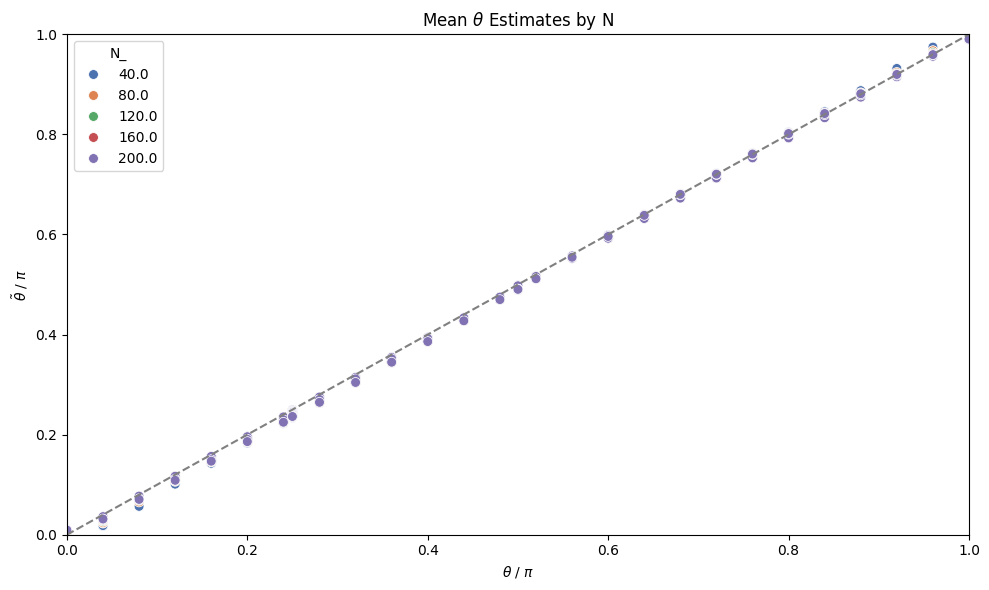

In [35]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"] < 201],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\tilde{\theta}$ / $\pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0, 1)
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

## Error

In [54]:
filtered

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.000000,0.015012,0.056978,0.003247,13312,0.785398,0.000000,0.000000
1,40.0,0.000000,0.785398,0.014054,0.054926,0.003017,13251,0.785398,0.000000,0.000000
2,40.0,0.000000,1.570796,0.013738,0.054517,0.002972,13397,0.785398,0.000000,0.000000
3,40.0,0.125664,0.000000,0.069227,0.110675,0.012249,13001,0.761087,0.077143,0.005951
4,40.0,0.125664,0.785398,0.055500,0.102215,0.010448,13316,0.767473,0.073511,0.005404
...,...,...,...,...,...,...,...,...,...,...
774,534640.0,0.628319,0.785398,0.601193,NaN,NaN,1,0.743808,NaN,NaN
775,535000.0,0.376991,0.785398,0.352631,NaN,NaN,1,0.723701,NaN,NaN
776,535320.0,0.502655,0.785398,0.473749,NaN,NaN,1,0.734136,NaN,NaN
777,535880.0,0.000000,1.570796,0.056099,NaN,NaN,1,0.380761,NaN,NaN


### Uncompensated

/tmp/ipykernel_1152096/554328612.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = theta_estimates[mask][theta_estimates["N_"] > 301]


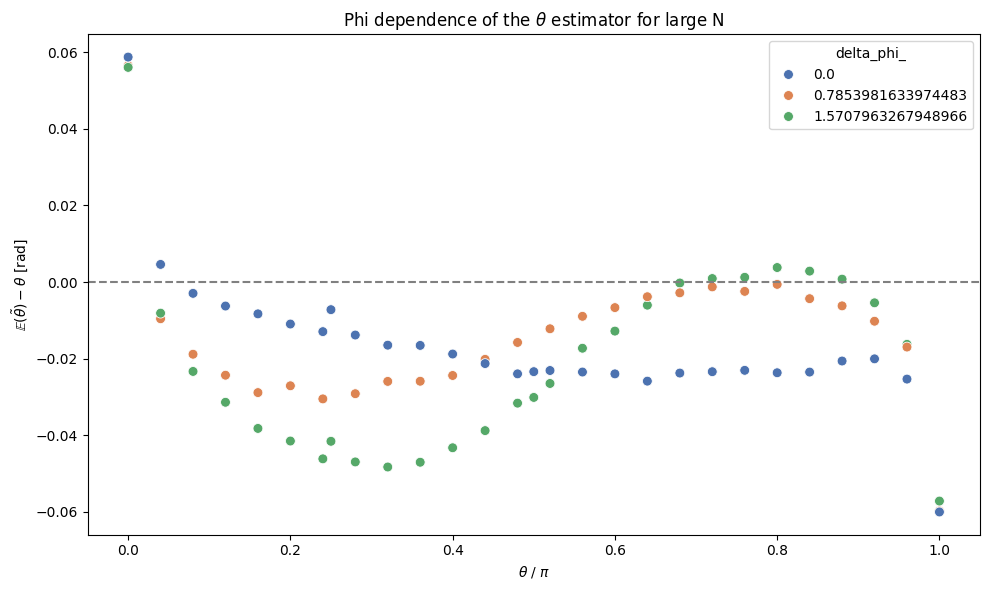

In [64]:
# Define tolerance (adjust as needed)
tol = 0.01  # radians

# Define target values for delta_phi
targets = [0, np.pi / 2, np.pi / 4]

# Create mask for filtering
mask = np.isclose(
    np.array(theta_estimates["delta_phi_"])[:, np.newaxis],
    targets,
    atol=tol
).any(axis=1)

# Apply mask to filter data
filtered = theta_estimates[mask][theta_estimates["N_"] > 301]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_"]),
    hue=filtered["delta_phi_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\mathbb{E}(\tilde{\theta}) - \theta\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Phi dependence of the $\theta$ estimator for large N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_delta_phi_at_large_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

### Compensated

## Variance

### Without Theory

#### By Phi

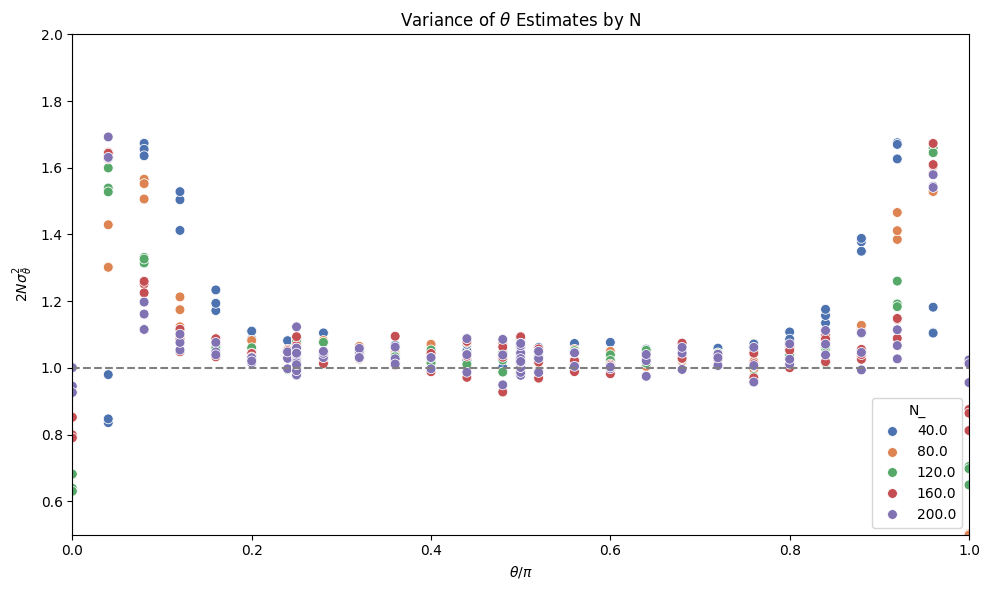

In [37]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Integrated over phi

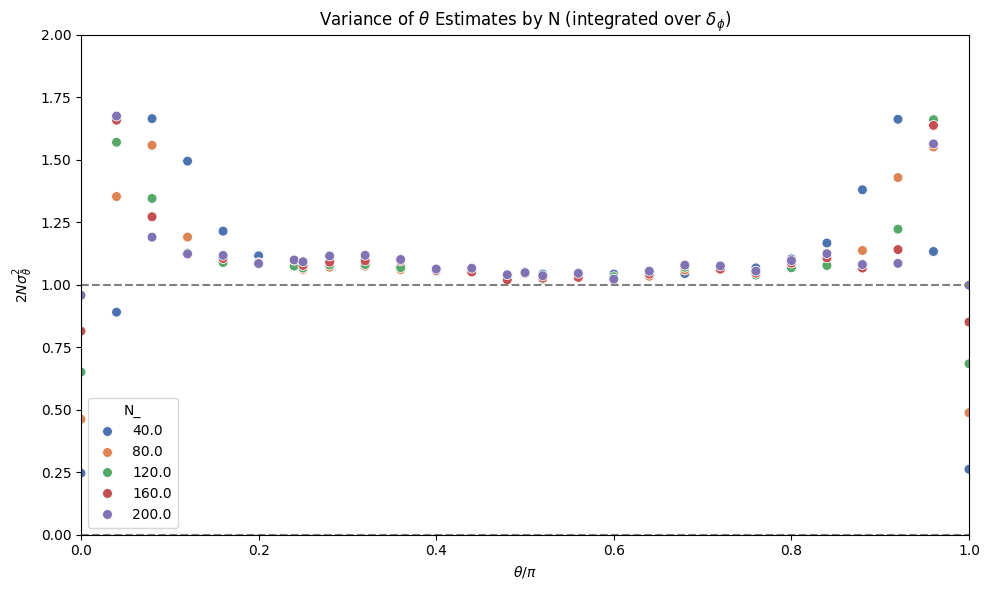

In [72]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates_integrated_over_phi[theta_estimates_integrated_over_phi["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates_integrated_over_phi["theta_"] / np.pi,
    y=theta_estimates_integrated_over_phi["theta_estimate_var"] * 2 * theta_estimates_integrated_over_phi["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N (integrated over $\delta_\phi$)")

plt.xlim(0, 1)
plt.ylim(0, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N_integrated_over_phi.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

### With Theory

#### By phi

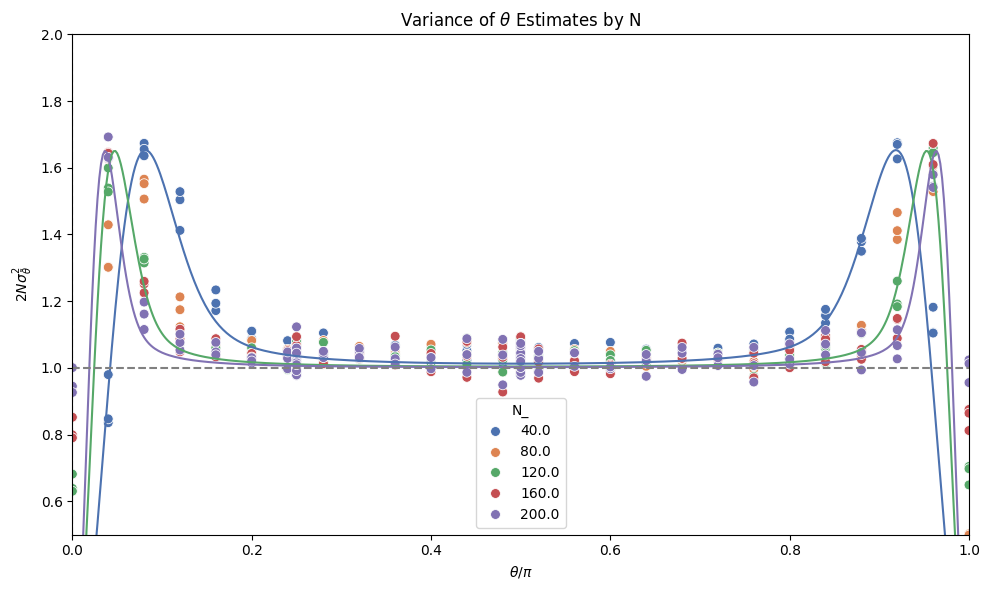

In [38]:
# plot theta_estimates with the theory curve
plt.figure(figsize=(10, 6))

N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette=color_dict,
    s=50,
)

# Add theory curve line
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 120, 200])]
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette=color_dict,
    legend=False,
)

plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Integrated over phi

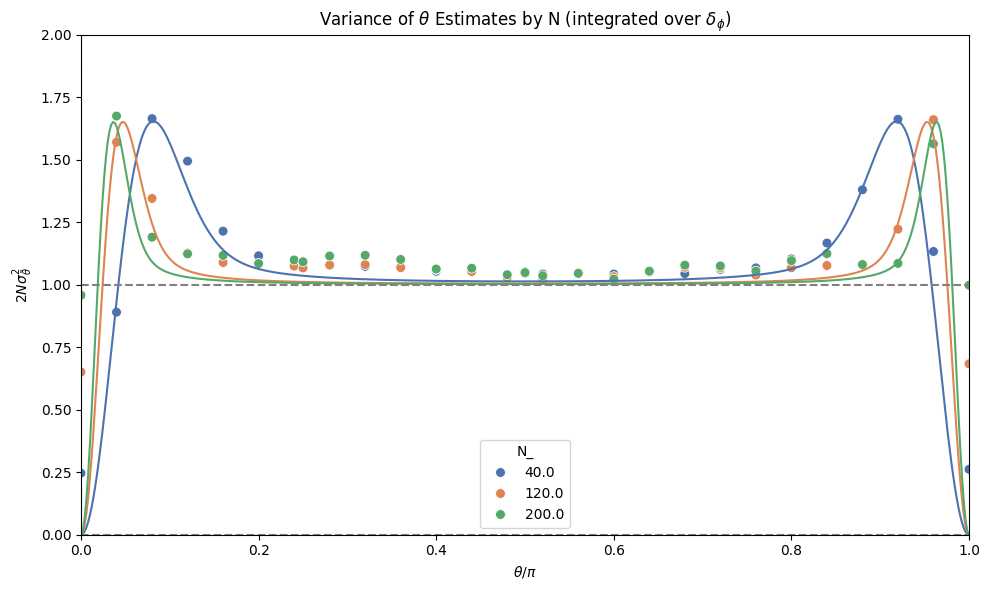

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set up
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter integrated data
filtered_data = theta_estimates_integrated_over_phi[
    theta_estimates_integrated_over_phi["N_"].isin(N_values)
]

# Filter theory data
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 120, 200])]

# Start plotting
plt.figure(figsize=(10, 6))

# Scatter plot for integrated-over-phi empirical data
sns.scatterplot(
    data=filtered_data,
    x=filtered_data["theta_"] / np.pi,
    y=filtered_data["theta_estimate_var"] * 2 * filtered_data["N_"],
    hue="N_",
    palette=color_dict,
    s=50,
)

# Line plot for theory curves
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette=color_dict,
    legend=False,  # Keeps legend from duplicating
)

# Axes and labels
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

# Reference lines
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N (integrated over $\delta_\phi$)")

# Axis limits
plt.xlim(0, 1)
plt.ylim(0, 2)

# Save and show
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N_integrated_over_phi.png"
)
plt.savefig(file_name, dpi=300)
plt.show()


# Delta Phi

In [39]:
# only when theta = pi/2 or pi/4
delta_phi_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "delta_phi_estimate": ["mean", "std", "var",],
    "delta_phi": "count",
    "theta_estimate": ["mean", "std", "var"]
}).reset_index()
delta_phi_estimates.columns = ['_'.join(col).strip() for col in delta_phi_estimates.columns.values]
delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,0.000000,0.000000,0.785398,0.000000,0.000000,13312,0.015012,0.056978,0.003247
1,40.0,0.000000,0.785398,0.785398,0.000000,0.000000,13251,0.014054,0.054926,0.003017
2,40.0,0.000000,1.570796,0.785398,0.000000,0.000000,13397,0.013738,0.054517,0.002972
3,40.0,0.125664,0.000000,0.761087,0.077143,0.005951,13001,0.069227,0.110675,0.012249
4,40.0,0.125664,0.785398,0.767473,0.073511,0.005404,13316,0.055500,0.102215,0.010448
...,...,...,...,...,...,...,...,...,...,...
775,535000.0,0.376991,0.785398,0.723701,NaN,NaN,1,0.352631,NaN,NaN
776,535320.0,0.502655,0.785398,0.734136,NaN,NaN,1,0.473749,NaN,NaN
777,535880.0,0.000000,1.570796,0.380761,NaN,NaN,1,0.056099,NaN,NaN
778,535920.0,0.785398,0.188496,0.220021,NaN,NaN,1,0.774521,NaN,NaN


#### Theta = pi/2

In [40]:
# get the subset where theta = pi/2 using numpy to find theta close to pi/2

delta_phi_estimates_theta_pi_over_2 = delta_phi_estimates[
    np.isclose(delta_phi_estimates["theta_"], np.pi / 2, atol=0.001)
].reset_index(drop=True)
delta_phi_estimates_theta_pi_over_2

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,1.570796,0.000000,0.248653,0.063786,0.004069,13172,1.547216,0.113707,0.012929
1,40.0,1.570796,0.062832,0.250239,0.064713,0.004188,13187,1.548507,0.113267,0.012829
2,40.0,1.570796,0.125664,0.259280,0.069935,0.004891,13104,1.548428,0.112435,0.012642
3,40.0,1.570796,0.188496,0.274047,0.078682,0.006191,13156,1.547470,0.113161,0.012805
4,40.0,1.570796,0.251327,0.300348,0.088852,0.007895,13095,1.547630,0.113705,0.012929
...,...,...,...,...,...,...,...,...,...,...
151,525960.0,1.570796,0.376991,0.374202,NaN,NaN,1,1.550299,NaN,NaN
152,526200.0,1.570796,0.314159,0.321942,NaN,NaN,1,1.548354,NaN,NaN
153,526240.0,1.570796,0.188496,0.229755,NaN,NaN,1,1.547619,NaN,NaN
154,526880.0,1.570796,0.000000,0.171242,NaN,NaN,1,1.547364,NaN,NaN


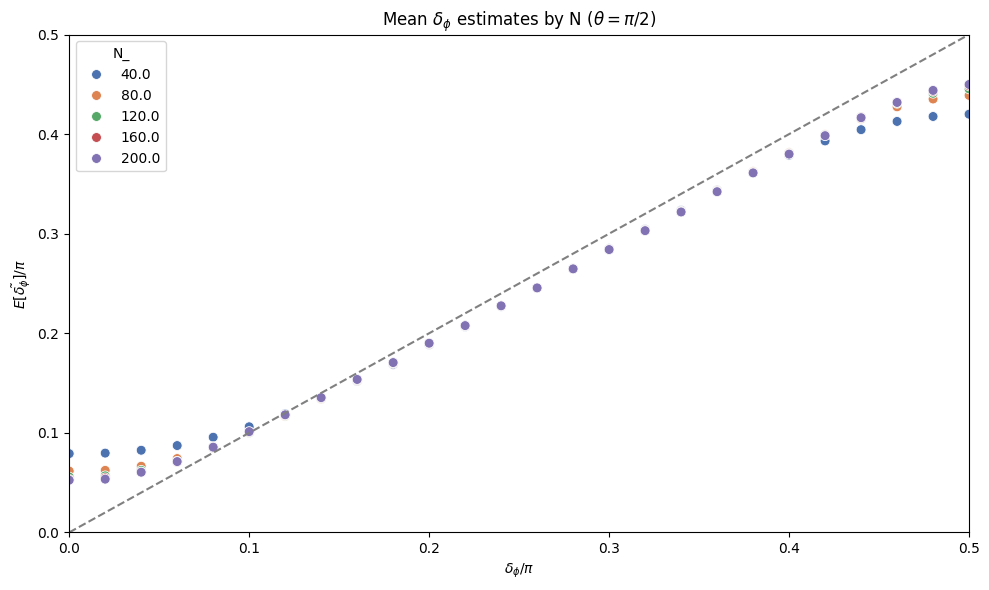

In [41]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[
        delta_phi_estimates_theta_pi_over_2["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")

plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()
plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

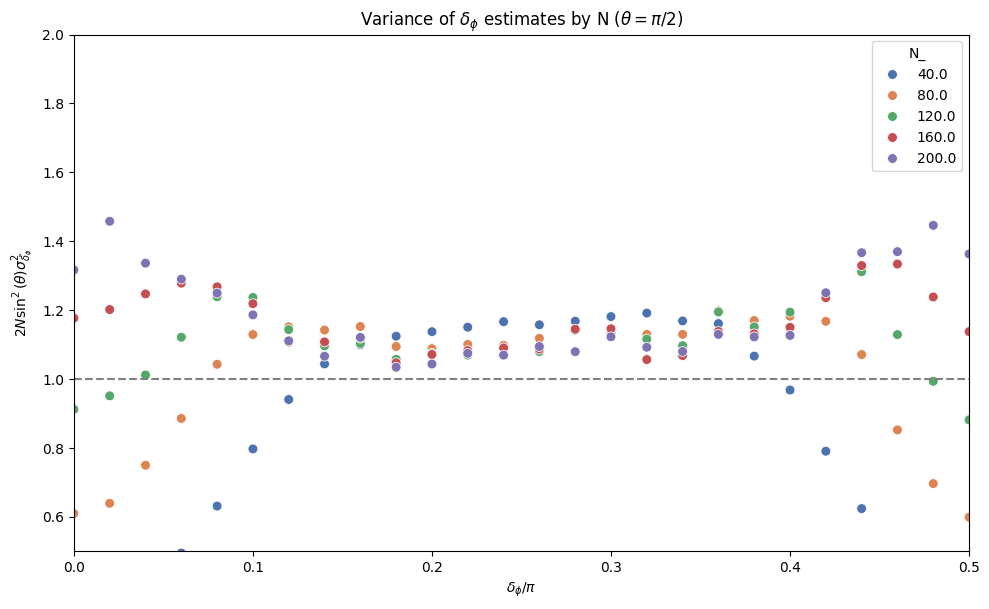

In [42]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[delta_phi_estimates_theta_pi_over_2["N_"].isin([40, 80, 120, 160, 200])],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_var"] * 2 * delta_phi_estimates_theta_pi_over_2["N_"] * np.sin(delta_phi_estimates_theta_pi_over_2["theta_"]) **2,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlim(0, 1/2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\theta) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$")

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_1152096/4045133925.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


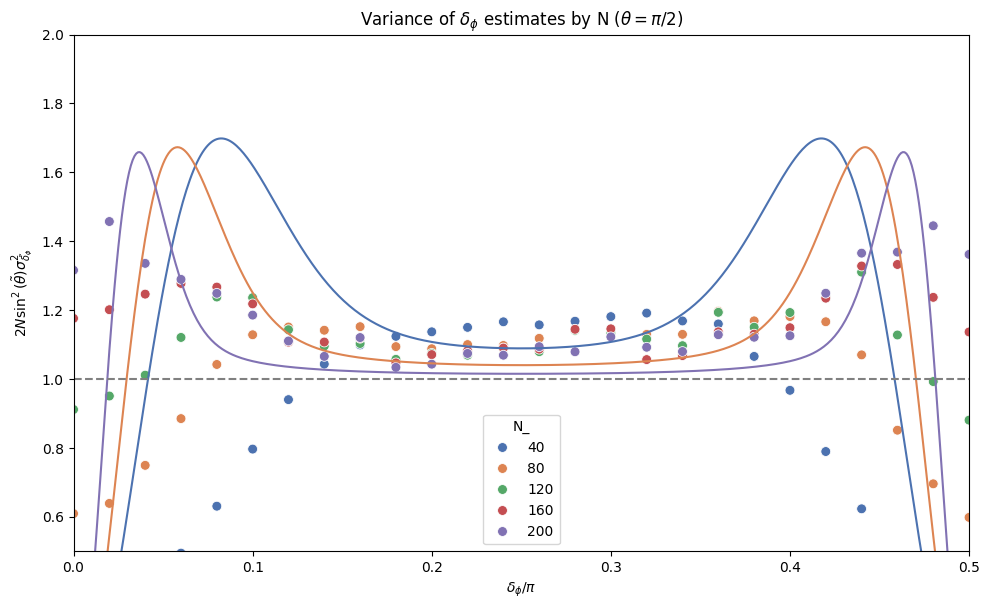

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_2[
    delta_phi_estimates_theta_pi_over_2["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Can be different subset
][delta_phi_theory["theta"] == np.pi / 2]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

In [76]:
data_filtered

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
21,40.0,0.785398,0.000000,0.343131,0.080114,0.006418,13344,0.771404,0.114804,0.013180
22,40.0,0.785398,0.062832,0.341830,0.080854,0.006537,13313,0.771796,0.115069,0.013241
23,40.0,0.785398,0.125664,0.345846,0.081643,0.006666,13335,0.768581,0.115716,0.013390
24,40.0,0.785398,0.188496,0.356044,0.089900,0.008082,13398,0.767818,0.113896,0.012972
25,40.0,0.785398,0.251327,0.372814,0.098929,0.009787,13330,0.768445,0.115035,0.013233
...,...,...,...,...,...,...,...,...,...,...
562,200.0,0.785398,1.319469,1.224511,0.080790,0.006527,2599,0.750535,0.051013,0.002602
563,200.0,0.785398,1.382301,1.280878,0.078088,0.006098,2593,0.746575,0.050391,0.002539
564,200.0,0.785398,1.445133,1.325243,0.075007,0.005626,2604,0.740901,0.051470,0.002649
565,200.0,0.785398,1.507964,1.361602,0.068427,0.004682,2596,0.742149,0.050241,0.002524


/tmp/ipykernel_1152096/2678357665.py:16: RuntimeWarning: divide by zero encountered in divide
  cramer_rao = 1 / fisher_information


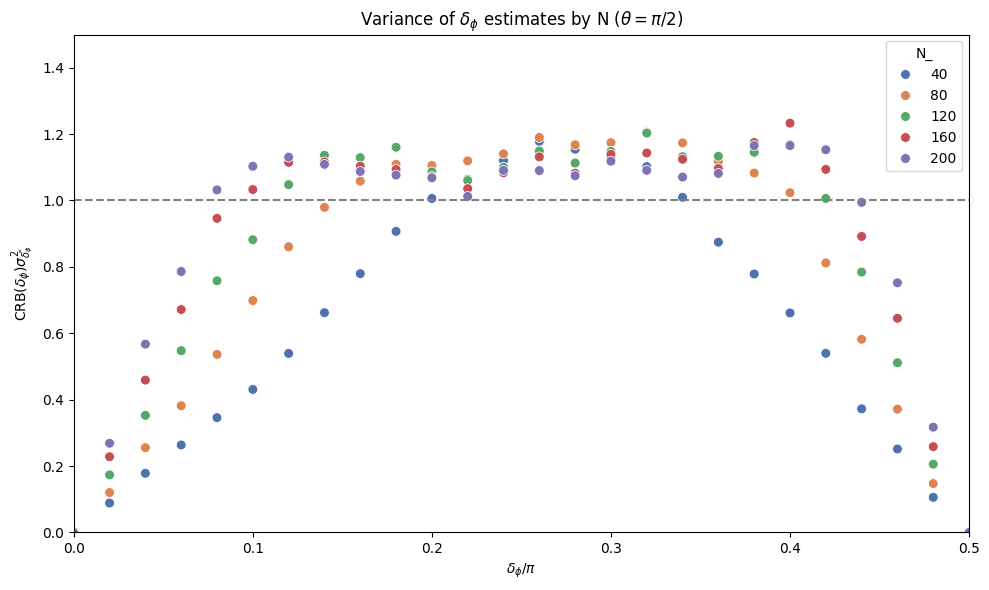

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Cramér-Rao bound data
eta = 0.985
delta_phi_range = np.linspace(0, np.pi / 2, 100)
fisher_information = (
    eta**2 * np.sin(2*delta_phi_range) ** 2 / (1 - eta**2 * np.cos(2*delta_phi_range) ** 2)
)
cramer_rao = 1 / fisher_information

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_"]) ** 2
    * eta**2 * np.sin(2*data_filtered["delta_phi_"]) ** 2 / (1 - eta**2 * np.cos(2*data_filtered["delta_phi_"]) ** 2), # CRB
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot the cramér-rao bound
# sns.lineplot(
#     x=delta_phi_range / np.pi,
#     y=cramer_rao,
#     color="black",
#     label="Cramér-Rao Bound",
#     linestyle="--",
# )

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")



plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Theta = pi/4

In [45]:
delta_phi_estimates_theta_pi_over_4 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 4]
delta_phi_estimates_theta_pi_over_4

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
21,40.0,0.785398,0.000000,0.343131,0.080114,0.006418,13344,0.771404,0.114804,0.013180
22,40.0,0.785398,0.062832,0.341830,0.080854,0.006537,13313,0.771796,0.115069,0.013241
23,40.0,0.785398,0.125664,0.345846,0.081643,0.006666,13335,0.768581,0.115716,0.013390
24,40.0,0.785398,0.188496,0.356044,0.089900,0.008082,13398,0.767818,0.113896,0.012972
25,40.0,0.785398,0.251327,0.372814,0.098929,0.009787,13330,0.768445,0.115035,0.013233
...,...,...,...,...,...,...,...,...,...,...
769,533200.0,0.785398,0.251327,0.261548,NaN,NaN,1,0.775285,NaN,NaN
770,533400.0,0.785398,0.125664,0.185204,NaN,NaN,1,0.775491,NaN,NaN
772,533760.0,0.785398,0.000000,0.178707,NaN,NaN,1,0.778169,NaN,NaN
773,533760.0,0.785398,0.314159,0.306970,NaN,NaN,1,0.772607,NaN,NaN


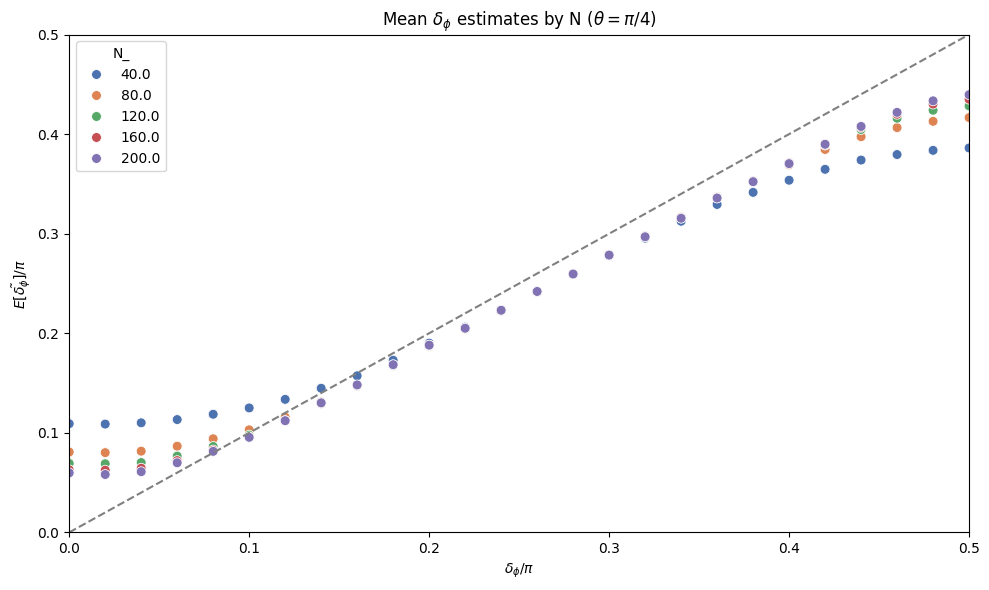

In [46]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)


plt.xlabel(r"$\delta_{\phi} / \pi$")

plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

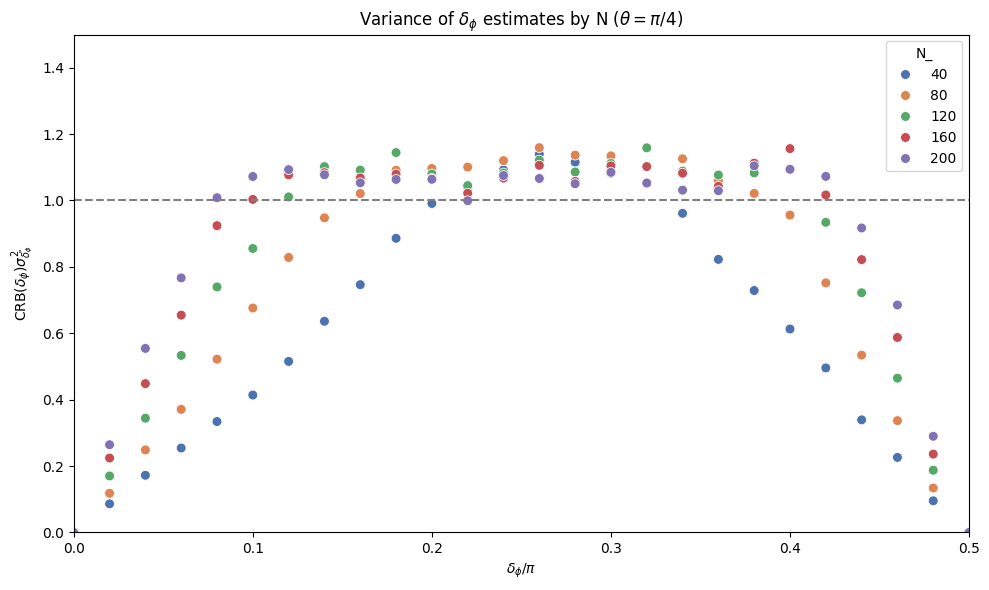

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Plot delta_phi_estimates for theta = pi/4 with CRB scaling
plt.figure(figsize=(10, 6))
data_pi_4 = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]

sns.scatterplot(
    data=data_pi_4,
    x=data_pi_4["delta_phi_"] / np.pi,
    y=data_pi_4["delta_phi_estimate_var"]
    * 2
    * data_pi_4["N_"]
    * np.sin(data_pi_4["theta_estimate_mean"]) ** 2
    * eta**2 * np.sin(2 * data_pi_4["delta_phi_"]) ** 2
    / (1 - eta**2 * np.cos(2 * data_pi_4["delta_phi_"]) ** 2),
    hue=data_pi_4["N_"].astype(int),
    palette=color_dict,
    s=50,
)

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

plt.tight_layout()

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()


/tmp/ipykernel_1152096/2932750281.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = delta_phi_theory[


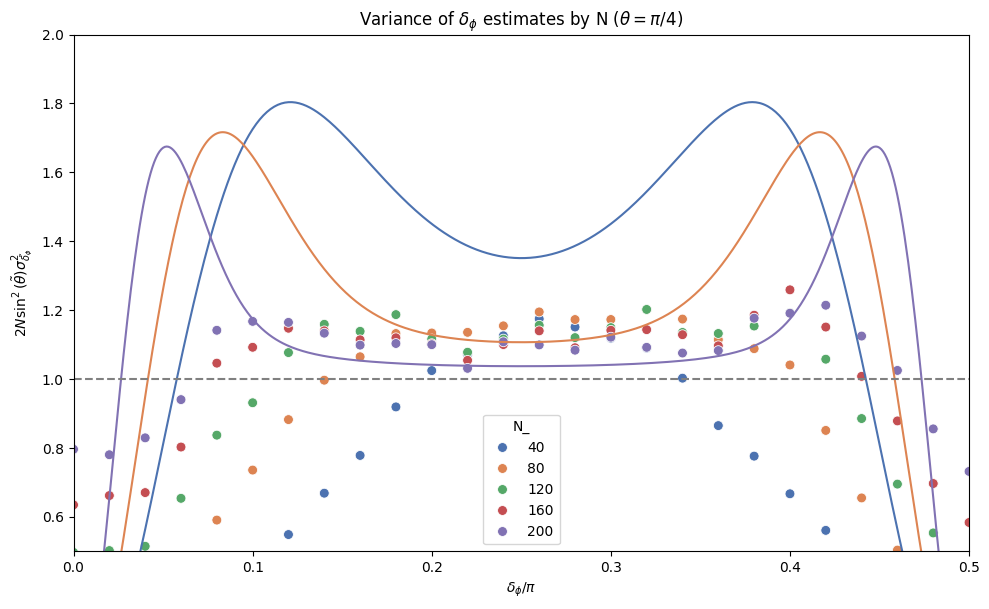

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]
theory_filtered = delta_phi_theory[
    delta_phi_theory["n"].isin([40, 80, 200])  # Adjust if needed
][delta_phi_theory["theta"] == np.pi * 0.25]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean"]) ** 2,
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot theory lines
sns.lineplot(
    data=theory_filtered,
    x=theory_filtered["delta_phi"] / np.pi,
    y=theory_filtered["delta_phi_estimator_variance"]
    * 2
    * theory_filtered["n"]
    * np.sin(theory_filtered["theta"])
    ** 2,  # * 2 * theory_filtered["n"] * np.sin(theory_filtered["theta"]) ** 2,
    hue="n",
    palette=color_dict,
    legend=False,  # Disable legend for theory lines
)

plt.xlim(0, 1 / 2)
plt.ylim(0.5, 2)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$2 N \sin^2(\tilde{\theta}) \sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.tight_layout()
plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()